In [1]:
import pandas as pd
import numpy as np

In [4]:
Data1 = pd.read_csv("/home/shridhar/Downloads/Finaldata.csv")
Data1.head()

,Unnamed: 0,AuthDate,PrdId,SchId,BaseQty,PrdNetAmount,PrdGrossAmount,Budget
0,1,2014-05-21 00:00:00,21,850,10,1102.22222,9.876543e+02,13922
1,2,2012-04-24 00:00:00,27,1232,5,24942.35981,2.685825e+04,155100
2,3,2012-04-24 00:00:00,27,1232,188,981004.68000,1.009870e+06,155100
3,4,2012-08-23 00:00:00,92,1387,24,803.22936,7.968545e+02,3555
4,5,2013-02-18 00:00:00,92,1671,3,107.33945,1.022280e+02,3383


In [5]:
profit = Data1.PrdGrossAmount - Data1.PrdNetAmount

In [6]:
aa=Data1.groupby(['PrdId'])['BaseQty','PrdGrossAmount','Budget'].sum()

In [7]:
aa.reset_index(level=0, inplace=True)


In [10]:
aa['Unit_gross_amount']=aa.PrdGrossAmount/aa.BaseQty
aa.head()

,PrdId,BaseQty,PrdGrossAmount,Budget,Unit_gross_amount
0,21,10,9.876543e+02,13922,98.765432
1,27,193,1.036728e+06,310200,5371.650000
2,92,248,8.336392e+03,198679,33.614482
3,93,9203,9.568327e+05,24010128,103.969649
4,95,10,3.494976e+02,13532,34.949760


In [11]:
from pulp import *
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

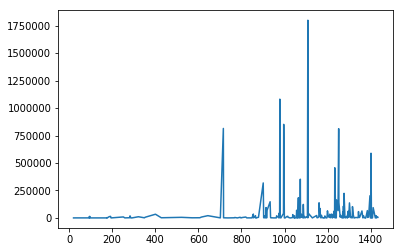

In [12]:
plt.plot(aa.PrdId,aa.BaseQty)

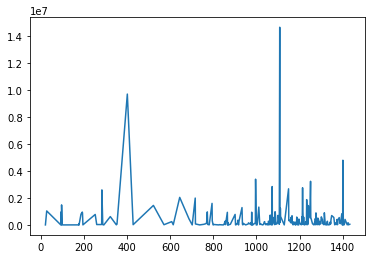

In [13]:
plt.plot(aa.PrdId,aa.PrdGrossAmount)

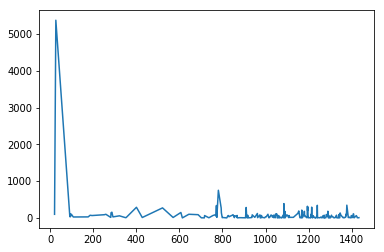

In [14]:
plt.plot(aa.PrdId, aa.Unit_gross_amount)

In [15]:
prob = pulp.LpProblem("maximize_production", pulp.LpMaximize)

In [16]:
decision_variable = []
for rownum,row in aa.iterrows():
    variable = str('X'+ str(rownum))
    variable = pulp.LpVariable(str(variable), lowBound= 0, upBound= 1, cat="Integer")
    decision_variable.append(variable)

In [17]:
print("Total number of Decision Varaiable" + str(len(decision_variable)))
print("Array with Decision Variable:"+str(decision_variable))

Total number of Decision Varaiable288
Array with Decision Variable:[X0, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X27, X28, X29, X30, X31, X32, X33, X34, X35, X36, X37, X38, X39, X40, X41, X42, X43, X44, X45, X46, X47, X48, X49, X50, X51, X52, X53, X54, X55, X56, X57, X58, X59, X60, X61, X62, X63, X64, X65, X66, X67, X68, X69, X70, X71, X72, X73, X74, X75, X76, X77, X78, X79, X80, X81, X82, X83, X84, X85, X86, X87, X88, X89, X90, X91, X92, X93, X94, X95, X96, X97, X98, X99, X100, X101, X102, X103, X104, X105, X106, X107, X108, X109, X110, X111, X112, X113, X114, X115, X116, X117, X118, X119, X120, X121, X122, X123, X124, X125, X126, X127, X128, X129, X130, X131, X132, X133, X134, X135, X136, X137, X138, X139, X140, X141, X142, X143, X144, X145, X146, X147, X148, X149, X150, X151, X152, X153, X154, X155, X156, X157, X158, X159, X160, X161, X162, X163, X164, X165, X166, X167, X168, X169, X170, X171, X172, X173

In [18]:
total_cost = ""

for rownum, row in aa.iterrows():
    for i, shedule in enumerate(decision_variable):
        if rownum == i:
            formula = row['BaseQty']*shedule
            total_cost += formula
            
prob += total_cost

In [19]:
print("optimal Function :" + str(total_cost))

optimal Function :10.0*X0 + 193.0*X1 + 2751.0*X10 + 6174.0*X100 + 3203.0*X101 + 264.0*X102 + 58.0*X103 + 1086.0*X104 + 3146.0*X105 + 30258.0*X106 + 13545.0*X107 + 149.0*X108 + 19282.0*X109 + 6.0*X11 + 733.0*X110 + 784.0*X111 + 212.0*X112 + 93.0*X113 + 77.0*X114 + 156.0*X115 + 19073.0*X116 + 19489.0*X117 + 69787.0*X118 + 6.0*X119 + 10935.0*X12 + 6166.0*X120 + 1034.0*X121 + 183512.0*X122 + 28000.0*X123 + 1433.0*X124 + 938.0*X125 + 372.0*X126 + 352368.0*X127 + 7139.0*X128 + 14455.0*X129 + 14253.0*X13 + 4686.0*X130 + 33909.0*X131 + 6705.0*X132 + 28917.0*X133 + 53.0*X134 + 60199.0*X135 + 122880.0*X136 + 6928.0*X137 + 299.0*X138 + 13790.0*X139 + 13069.0*X14 + 1230.0*X140 + 4744.0*X141 + 8753.0*X142 + 7401.0*X143 + 2720.0*X144 + 1799074.0*X145 + 2680.0*X146 + 5878.0*X147 + 37890.0*X148 + 38326.0*X149 + 47.0*X15 + 80.0*X150 + 22181.0*X151 + 2610.0*X152 + 1815.0*X153 + 10011.0*X154 + 137626.0*X155 + 11214.0*X156 + 85094.0*X157 + 25698.0*X158 + 21768.0*X159 + 8862.0*X16 + 955.0*X160 + 705.0*X161

In [27]:
total_unit_gross_production = ""

for rownum, row in aa.iterrows():
    for i, shedule in enumerate(decision_variable):
        if rownum == i:
            formula = row["Unit_gross_amount"]*shedule
            total_unit_gross_production += formula
            
prob += (total_unit_gross_production == 100)

In [57]:
# print(prob)
#prob.solve()

In [28]:
prob.writeLP("maximize_production.lp")

In [ ]:
optimization_result = prob.solve()

assert optimization_result == pulp.LpStatusOptimal
print("status", LpStatus[prob.status])
print("optimal Solution of the problem :", value(prob.objective))
print("individual decision variable :")
for v in prob.variables():
    print(v.name ,"m", v.varValues)

In [23]:
print("status", LpStatus[prob.status])

status Not Solved


In [24]:
print("optimal Solution of the problem :", value(prob.objective))

optimal Solution of the problem : None


In [25]:
optimization_result = prob.solve()

KeyboardInterrupt: 

In [26]:
assert optimization_result == pulp.LpStatusOptimal

NameError: name 'optimization_result' is not defined

In [31]:
aa['Product_type']=np.where(aa['Unit_gross_amount']<=150,"Low_Price_Prd",np.where(aa['Unit_gross_amount']<= 300,"Medium_Price_Prd","High_Price_Prd"))

In [32]:
aa['Product_class']=np.where(aa['Product_type']=='Low_Price_Prd',"economy",'premium')

In [33]:
aa.head()

,PrdId,BaseQty,PrdGrossAmount,Budget,Unit_gross_amount,Product_type,Product_class
0,21,10,9.876543e+02,13922,98.765432,Low_Price_Prd,economy
1,27,193,1.036728e+06,310200,5371.650000,High_Price_Prd,premium
2,92,248,8.336392e+03,198679,33.614482,Low_Price_Prd,economy
3,93,9203,9.568327e+05,24010128,103.969649,Low_Price_Prd,economy
4,95,10,3.494976e+02,13532,34.949760,Low_Price_Prd,economy


<BarContainer object of 288 artists>

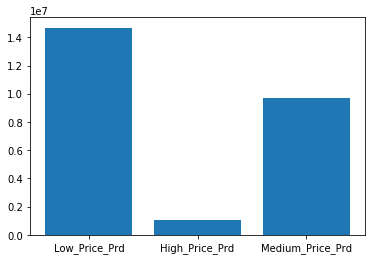

In [34]:
plt.bar(aa.Product_type, aa.PrdGrossAmount)

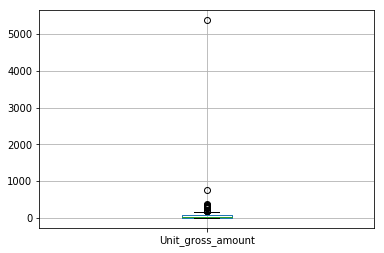

In [35]:
aa.boxplot(column= "Unit_gross_amount")

In [36]:
aa.columns

Index(['PrdId', 'BaseQty', 'PrdGrossAmount', 'Budget', 'Unit_gross_amount',
       'Product_type', 'Product_class'],
      dtype='object')

In [37]:
np.quantile(aa.Unit_gross_amount, .99)

352.68493178957965

In [38]:
aa = aa.drop(aa.index[1])

In [39]:
# Instantiate our problem class
model = pulp.LpProblem("Cost minimising blending problem", pulp.LpMinimize)

In [40]:
# Construct our decision variable lists
Product_class = ['economy', 'premium']
Product_type = ['Low_Price_Prd', 'Medium_Price_Prd', 'High_Price_Prd']

In [41]:
ing_weight = pulp.LpVariable.dicts("Price Rs",
                                     ((i, j) for i in Product_class for j in Product_type),
                                     lowBound=0,
                                     cat='Continuous')

In [42]:
ing_weight

{('economy', 'Low_Price_Prd'): Price_Rs_('economy',_'Low_Price_Prd'),
 ('economy', 'Medium_Price_Prd'): Price_Rs_('economy',_'Medium_Price_Prd'),
 ('economy', 'High_Price_Prd'): Price_Rs_('economy',_'High_Price_Prd'),
 ('premium', 'Low_Price_Prd'): Price_Rs_('premium',_'Low_Price_Prd'),
 ('premium', 'Medium_Price_Prd'): Price_Rs_('premium',_'Medium_Price_Prd'),
 ('premium', 'High_Price_Prd'): Price_Rs_('premium',_'High_Price_Prd')}

In [43]:

# Objective Function
model += (
    pulp.lpSum([
        4.32 * ing_weight[(i, 'Low_Price_Prd')]
        + 2.46 * ing_weight[(i, 'Medium_Price_Prd')]
        + 1.86 * ing_weight[(i, 'High_Price_Prd')]
        for i in Product_class])
)

In [44]:
#Constraints
# 350 economy and 500 premium product at 100 Rs
model += pulp.lpSum([ing_weight['economy', j] for j in Product_type]) == 350 * 100
model += pulp.lpSum([ing_weight['premium', j] for j in Product_type]) == 500 * 300

# Economy has >= 40% Low_Price_Prd, premium >= 60% Medium_Price_Prd
model += ing_weight['economy', 'Low_Price_Prd'] >= (
    0.4 * pulp.lpSum([ing_weight['economy', j] for j in Product_type]))

model += ing_weight['premium', 'Medium_Price_Prd'] >= (
    0.6 * pulp.lpSum([ing_weight['premium', j] for j in Product_type]))

model += ing_weight['premium', 'High_Price_Prd'] <= (
    0.25 * pulp.lpSum([ing_weight['premium', j] for j in Product_type]))

# We have at most 100 Rs of Low_Price_Prd, 200 Rs of Medium_Price_Prd and 300 of High_Price_Prd available
model += pulp.lpSum([ing_weight[i, 'Low_Price_Prd'] for i in Product_class]) <= 100
model += pulp.lpSum([ing_weight[i, 'Medium_Price_Prd'] for i in Product_class]) <= 200
model += pulp.lpSum([ing_weight[i, 'High_Price_Prd'] for i in Product_class]) <= 300

# We have at least 23 kg of pork to use up
#model += pulp.lpSum([ing_weight[i, 'High_Price_Prd'] for i in Product_class]) >= 300

In [45]:
# Solve our problem
model.solve()
pulp.LpStatus[model.status]

'Infeasible'

In [46]:
for var in ing_weight:
    var_value = ing_weight[var].varValue

In [47]:
print("The cost of {0} in {1} Class is {2} Rs".format(var[1], var[0], var_value))

The cost of High_Price_Prd in premium Class is 37500.0 Rs


In [49]:
total_cost = pulp.value(model.objective)

In [50]:
print("The total cost is Rs{} for 350 economy Product and 500 premium Product".format(round(total_cost, 2)))

The total cost is Rs555378.0 for 350 economy Product and 500 premium Product


In [51]:
sum(aa.PrdGrossAmount)

109131768.95381992

In [52]:
aa.Product_type.value_counts()

Low_Price_Prd       267
Medium_Price_Prd     14
High_Price_Prd        6
Name: Product_type, dtype: int64

In [53]:
aa[aa['Product_type']== 'High_Price_Prd'] 

,PrdId,BaseQty,PrdGrossAmount,Budget,Unit_gross_amount,Product_type,Product_class
41,772,2860,966025.81180,652764,337.771263,High_Price_Prd,premium
43,781,12,9025.36716,5760,752.113930,High_Price_Prd,premium
134,1085,53,20662.76813,232733,389.863550,High_Price_Prd,premium
180,1194,56,17777.77776,13446,317.460317,High_Price_Prd,premium
206,1240,1173,403084.11189,80844,343.635219,High_Price_Prd,premium
266,1377,1012,351295.06021,404201,347.129506,High_Price_Prd,premium


In [54]:
aa[aa['Product_type']== 'Medium_Price_Prd'] 

,PrdId,BaseQty,PrdGrossAmount,Budget,Unit_gross_amount,Product_type,Product_class
21,287,122,1.911170e+04,84770,156.653316,Medium_Price_Prd,premium
26,401,33534,9.710314e+06,154404142,289.566229,Medium_Price_Prd,premium
28,522,5294,1.446432e+06,2944291,273.221024,Medium_Price_Prd,premium
44,794,5886,1.598420e+06,437315,271.562989,Medium_Price_Prd,premium
70,910,335,9.541611e+04,865465,284.824210,Medium_Price_Prd,premium
138,1090,299,5.315556e+04,1750863,177.777780,Medium_Price_Prd,premium
153,1154,1815,3.426549e+05,5507286,188.790560,Medium_Price_Prd,premium
160,1168,955,2.043621e+05,256980,213.991770,Medium_Price_Prd,premium
167,1180,32,5.775701e+03,105468,180.490655,Medium_Price_Prd,premium
181,1195,67,1.329365e+04,20641,198.412698,Medium_Price_Prd,premium
